># Image Classification Model For Intel Image Classification Dataset based on Convolutional Neural Networks. 
>>##### By - Saif Ali Ahmad
Discription about dataset - This image data set focuses on natural scenes. It was created by Intel for an image classification competition.<br><br>
Dataset Details : There are approximately 25,000 images.Images are grouped into categories such as buildings, forests, glaciers, mountains, seas, and streets.<br><br> 
Dataset is divided into folders for training, testing, and prediction:<br><br>
14,000 training images<br>
3,000 validation images<br>
7,000 test images-<br><br>

>URL for data set - https://www.kaggle.com/datasets/puneet6060/intel-image-classification

#### Importing the libraries

In [1]:
# importing important libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
# displaying tensorflow version
tf.__version__

'2.10.1'

#### Confirming the avaibility of GPU

In [3]:
# searching for GPU in the system
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
  gpu_details = tf.config.experimental.get_device_details(gpu_devices[0])
  gpu_details.get('device_name', 'Unknown GPU')

In [4]:
# Displaying the details of available GPU
print('Name Of GPU Device               :',gpu_details['device_name'])
print('Compute Capability Of GPU Device :',gpu_details['compute_capability'])

Name Of GPU Device               : NVIDIA GeForce RTX 3050 Laptop GPU
Compute Capability Of GPU Device : (8, 6)


## Part 1 - Importing and Preprocessing the Images

In [5]:
# Importing the ImageDataGenerator class for preprocessing and loading the images
from keras.preprocessing.image import ImageDataGenerator

> ##### Defining the Batch Size

In [6]:
# Defining the batch size 
batchSize = 32

> ### Importing and Preprocessing the Training set

In [7]:
# Preprocessing the train set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [8]:
# Importing the training set and preprocessing it
training_set = train_datagen.flow_from_directory('D:\\Intel Image Dataset CNN Model\\Intel_Dataset\\train_set',
                                                 target_size = (64, 64),
                                                 batch_size = batchSize,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


> ### Importing and Preprocessing the Test set

In [9]:
# Preprocessing the test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Importing the training set and preprocessing it
test_set = test_datagen.flow_from_directory('D:\\Intel Image Dataset CNN Model\\Intel_Dataset\\test_set',
                                            target_size = (64, 64),
                                            batch_size = batchSize,
                                            class_mode = 'categorical')

Found 3000 images belonging to 6 classes.


## Part 2 - Building the CNN

#### Initialising the CNN

In [11]:
# initializing the keras sequention model
cnn = tf.keras.models.Sequential()

### Step 1 - Creating Convolution Layers

> #### Creating the First Convolutional layer

In [12]:
# Adding the first connvolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
# Adding Batch Normalization layer
cnn.add(tf.keras.layers.BatchNormalization())
# Adding the first Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

> #### Creating the Second Convolutional layer

In [13]:
# Adding the second connvolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
# Adding Batch Normalization layer
cnn.add(tf.keras.layers.BatchNormalization())
# Adding the second Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

> #### Creating the third Convolutional layer

In [14]:
# Adding the third connvolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
# Adding Batch Normalization layer
cnn.add(tf.keras.layers.BatchNormalization())
# Adding the third Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 2 - Flattening the Output of Convolution Layer <br>

In [15]:
# Flatteining the output of convolution layer
cnn.add(tf.keras.layers.Flatten())

### Step 3 - Adding Full Connection and Dropout Layer

> #### - First Full Connection Layer with Dropout

In [16]:
# Adding first full connection layer after flattening
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Adding the dropout layer for first full connection layer 
cnn.add(tf.keras.layers.Dropout(rate=0.5)) 

> #### - Second Full Connection Layer with Dropout

In [17]:
# Adding second full connection layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Adding the dropout layer for second full connection layer
cnn.add(tf.keras.layers.Dropout(rate=0.5)) 

### Step 4 - Adding Output Layer <br>

In [19]:
# Adding the Output layer for image classification
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

## Part 3 - Creating Callback Functions

In [20]:
# Adding Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

> #### ModelCheckpoint Callback

In [21]:
# ModelCheckpoint callback saves a model at some interval. 
#File name includes epoch and validation accuracy.
filepath="D:\\Intel Image Dataset CNN Model\\Model_Performance\\saved_models\\weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" 

#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

> #### EarlyStopping Callback

In [22]:
# EarlyStopping callback will stop the training when there is no improvement in the 
# validation loss for fifteen consecutive epochs.
early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

> #### CSVLogger Callback

In [23]:
# CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('D:\\Intel Image Dataset CNN Model\\Model_Performance\\csv_logger\\Intel_CNN_Model_logs.csv',
                    separator=',', append=False)

In [24]:
# list of callbacks to be applied while training the model
callbacks_list = [checkpoint, early_stop, log_csv]

## Part 4 - Training the CNN

> ### Compiling the CNN Model <br>

In [25]:
# Compiling the above build model
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

> ### Training the CNN Model on the Training set and Evaluating it on the Test Set <br>

In [26]:
# Defining the number of Epochs for model training
No_Of_Epochs = 100

In [27]:
# Training the model using fit function on Training Set and calculating the model accuracy on Test Set
cnn.fit(x = training_set, validation_data = test_set, epochs = No_Of_Epochs,callbacks=callbacks_list)

Epoch 1/100
438/439 [============================>.] - ETA: 0s - loss: 1.4429 - accuracy: 0.4601
Epoch 1: val_accuracy improved from -inf to 0.57900, saving model to D:\Intel Image Dataset CNN Model\Model_Performance\saved_models\weights-improvement-01-0.58.hdf5
439/439 [==============================] - 23s 45ms/step - loss: 1.4423 - accuracy: 0.4603 - val_loss: 1.1248 - val_accuracy: 0.5790
Epoch 2/100
438/439 [============================>.] - ETA: 0s - loss: 1.0789 - accuracy: 0.5885
Epoch 2: val_accuracy improved from 0.57900 to 0.64733, saving model to D:\Intel Image Dataset CNN Model\Model_Performance\saved_models\weights-improvement-02-0.65.hdf5
439/439 [==============================] - 18s 42ms/step - loss: 1.0790 - accuracy: 0.5884 - val_loss: 1.0161 - val_accuracy: 0.6473
Epoch 3/100
438/439 [============================>.] - ETA: 0s - loss: 0.9436 - accuracy: 0.6538
Epoch 3: val_accuracy improved from 0.64733 to 0.71400, saving model to D:\Intel Image Dataset CNN Model\Mod

439/439 [==============================] - ETA: 0s - loss: 0.4434 - accuracy: 0.8482
Epoch 27: val_accuracy did not improve from 0.82600
439/439 [==============================] - 17s 38ms/step - loss: 0.4434 - accuracy: 0.8482 - val_loss: 0.6841 - val_accuracy: 0.7490
Epoch 28/100
439/439 [==============================] - ETA: 0s - loss: 0.4195 - accuracy: 0.8581
Epoch 28: val_accuracy did not improve from 0.82600
439/439 [==============================] - 17s 38ms/step - loss: 0.4195 - accuracy: 0.8581 - val_loss: 0.5225 - val_accuracy: 0.8173
Epoch 29/100
438/439 [============================>.] - ETA: 0s - loss: 0.4223 - accuracy: 0.8559
Epoch 29: val_accuracy improved from 0.82600 to 0.82967, saving model to D:\Intel Image Dataset CNN Model\Model_Performance\saved_models\weights-improvement-29-0.83.hdf5
439/439 [==============================] - 17s 40ms/step - loss: 0.4221 - accuracy: 0.8559 - val_loss: 0.4709 - val_accuracy: 0.8297
Epoch 30/100
438/439 [========================

Epoch 54/100
439/439 [==============================] - ETA: 0s - loss: 0.3264 - accuracy: 0.8854
Epoch 54: val_accuracy did not improve from 0.86367
439/439 [==============================] - 17s 38ms/step - loss: 0.3264 - accuracy: 0.8854 - val_loss: 0.4894 - val_accuracy: 0.8457
Epoch 55/100
439/439 [==============================] - ETA: 0s - loss: 0.3212 - accuracy: 0.8902
Epoch 55: val_accuracy did not improve from 0.86367
439/439 [==============================] - 17s 38ms/step - loss: 0.3212 - accuracy: 0.8902 - val_loss: 0.5730 - val_accuracy: 0.8040
Epoch 56/100
439/439 [==============================] - ETA: 0s - loss: 0.3086 - accuracy: 0.8933
Epoch 56: val_accuracy did not improve from 0.86367
439/439 [==============================] - 17s 39ms/step - loss: 0.3086 - accuracy: 0.8933 - val_loss: 0.5152 - val_accuracy: 0.8377
Epoch 57/100
439/439 [==============================] - ETA: 0s - loss: 0.3116 - accuracy: 0.8920
Epoch 57: val_accuracy did not improve from 0.86367
4

>> Early Stopping was implemented at Epoch-67 as Validation Accuracy was not improving.<br> The Best Performing Model has Accuracy of 86.367% in Epoch 52.

> #### Summary of CNN Model

In [28]:
# Model Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        

## Part 5 - Evaluating Model Performance <br>

In [29]:
# loading the CSVlogger callback file
model_log = pd.read_csv('D:\\Intel Image Dataset CNN Model\\Model_Performance\\csv_logger\\Intel_CNN_Model_logs.csv')
model_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.460311,1.442316,0.579000,1.124810
1,1,0.588428,1.078968,0.647333,1.016109
2,2,0.653627,0.943753,0.714000,0.807668
3,3,0.697307,0.854104,0.434000,1.509102
4,4,0.729443,0.780301,0.568000,1.563337
...,...,...,...,...,...
62,62,0.894684,0.303314,0.843333,0.482770
63,63,0.896822,0.296153,0.827333,0.497358
64,64,0.898603,0.293976,0.845000,0.521551
65,65,0.898675,0.294007,0.835667,0.549876


> #### Plotting Accuraracy and Loss for Training and Test sets

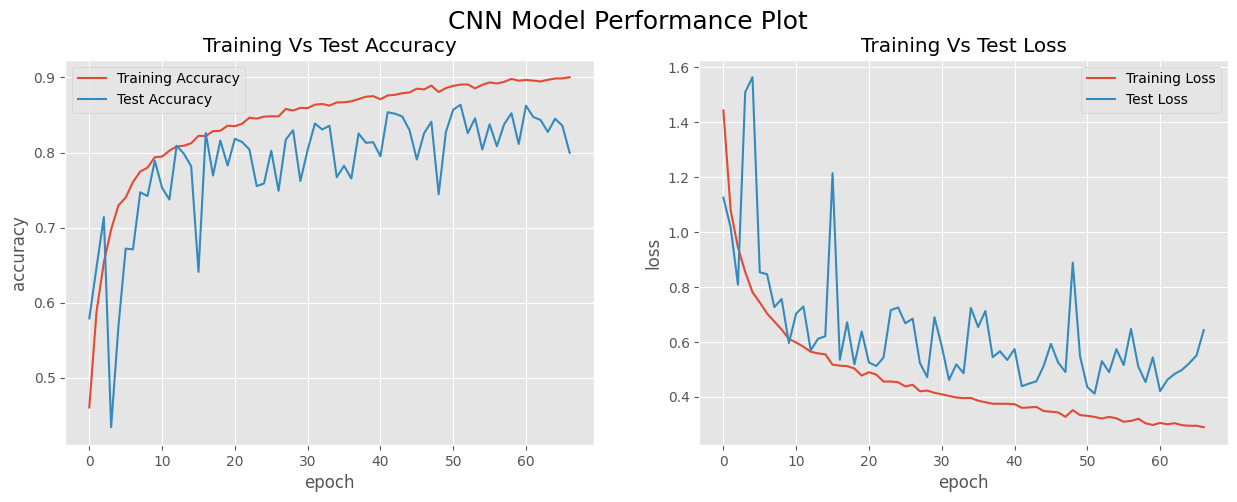

In [38]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 ,figsize =(15,5) , dpi = 100)

sns.lineplot(data=model_log, x="epoch", y='accuracy',label='Training Accuracy',ax=axis[0])
sns.lineplot(data=model_log, x="epoch", y='val_accuracy',label='Test Accuracy',ax=axis[0])
axis[0].set_title('Training Vs Test Accuracy')

sns.lineplot(data=model_log, x="epoch", y='loss',label='Training Loss',ax=axis[1])
sns.lineplot(data=model_log, x="epoch", y='val_loss',label='Test Loss',ax=axis[1])
axis[1].set_title('Training Vs Test Loss') 

fig.suptitle('CNN Model Performance Plot', fontsize=18)
plt.legend()
plt.show()

### Conclusion:
>Our CNN model achived the accuracy of 86.367 %.<br>There isn't much diffenece between the accuracy on Training Set and Test so we can confidently say that there is no Overfitting and as it is shown it performed well in the Test Set also.